# CNN for acoustic scene classfication: my home

Date: March 21, 2019

Neural network: input MFSCs to CNN

## Preparing data set for CNN

In [134]:
DATASET_FOLDER = '../dataset/data_my_home'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(flatten=False)
shape = ds.shape
class_labels = ds.class_labels
class_labels

['chat',
 'reading',
 'watching_tv',
 'cocking',
 'hamster',
 'silence',
 'vacuum_cleaner',
 'shower',
 'washing_machine',
 'doing_the_dishes']

((800, 64, 40, 1), (400, 64, 40, 1))

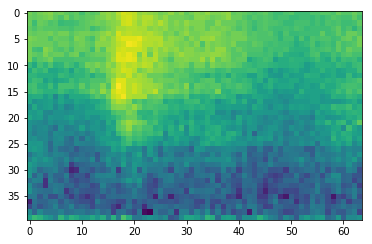

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)))
train_data.shape, test_data.shape

### CNN model

In [137]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 62, 38, 8)         80        
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 31, 19, 8)         0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 31, 19, 8)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 29, 17, 16)        1168      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 14, 8, 16)         0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 14, 8, 16)         0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 12, 6, 32)         4640      
__________

In [138]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

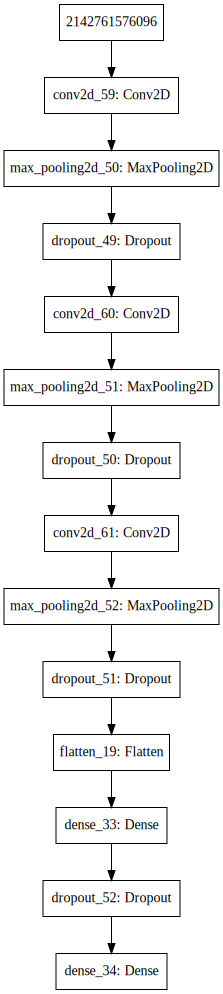

In [139]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training CNN

In [140]:
EPOCHS = 50
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 800 samples, validate on 400 samples
Epoch 1/50
800/800 [==============================] - 26s 32ms/step - loss: 2.2914 - acc: 0.1425 - val_loss: 2.2131 - val_acc: 0.2900
Epoch 2/50
800/800 [==============================] - 24s 30ms/step - loss: 2.0493 - acc: 0.2325 - val_loss: 1.9222 - val_acc: 0.3400
Epoch 3/50
800/800 [==============================] - 24s 30ms/step - loss: 1.8690 - acc: 0.3000 - val_loss: 1.8066 - val_acc: 0.4425
Epoch 4/50
800/800 [==============================] - 24s 30ms/step - loss: 1.7401 - acc: 0.3650 - val_loss: 1.6615 - val_acc: 0.4350
Epoch 5/50
800/800 [==============================] - 24s 30ms/step - loss: 1.5989 - acc: 0.4175 - val_loss: 1.5230 - val_acc: 0.5275
Epoch 6/50
800/800 [==============================] - 23s 29ms/step - loss: 1.4801 - acc: 0.4775 - val_loss: 1.4082 - val_acc: 0.5875
Epoch 7/50
800/800 [==============================] - 24s 29ms/step - loss: 1.3607 - acc: 0.5425 - val_loss: 1.3147 - val_acc: 0.6050
Epoch 8/50
800/8

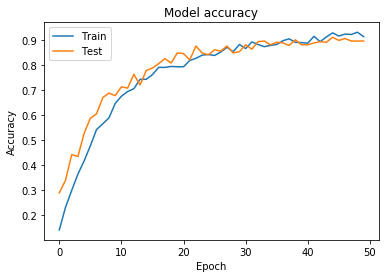

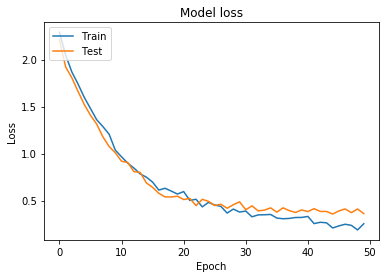

In [141]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [142]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/cnn_for_aed_my_home{}.h5'.format(dt)
model.save(filename)

## Load the model

In [143]:
del model
model = models.load_model(filename)

## Confirmation

In [144]:
import numpy as np
import matplotlib.pyplot as plt

In [145]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [146]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [147]:
class_labels

['chat',
 'reading',
 'watching_tv',
 'cocking',
 'hamster',
 'silence',
 'vacuum_cleaner',
 'shower',
 'washing_machine',
 'doing_the_dishes']

In [148]:
(activations[-1][:10]*100).astype(int)

array([[ 0,  5,  0,  2, 81,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 48,  0, 49,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 99,  0,  0,  0],
       [ 3,  0,  0, 33,  3,  0,  0,  0,  0, 59],
       [ 0,  0,  0,  0,  0,  0,  0, 99,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0, 79,  5,  0],
       [ 0,  6,  0, 87,  3,  1,  0,  0,  0,  0],
       [ 0, 89,  0,  7,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 99,  0,  0,  0],
       [ 2, 37, 28, 10, 16,  0,  0,  1,  1,  0]])

In [149]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [150]:
%run ./plot_layer.py

'shower'

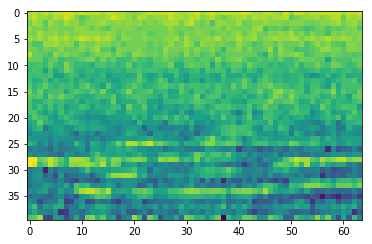

In [151]:
image_number = 5

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
class_labels[np.argmax(test_labels[image_number])]

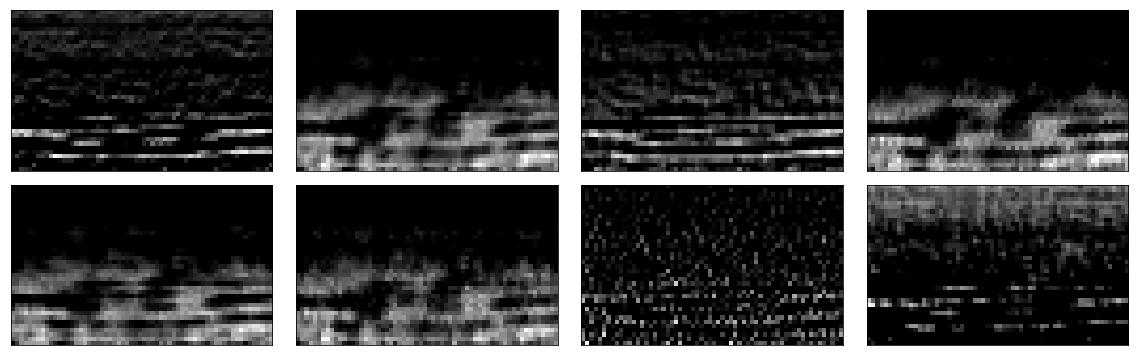

In [152]:
plot_layer(activations, image_number, 0, 4)

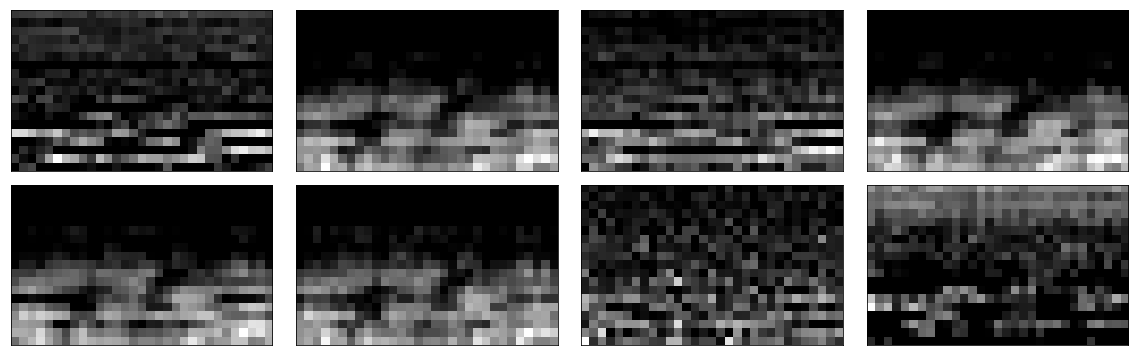

In [153]:
plot_layer(activations, image_number, 1, 4)

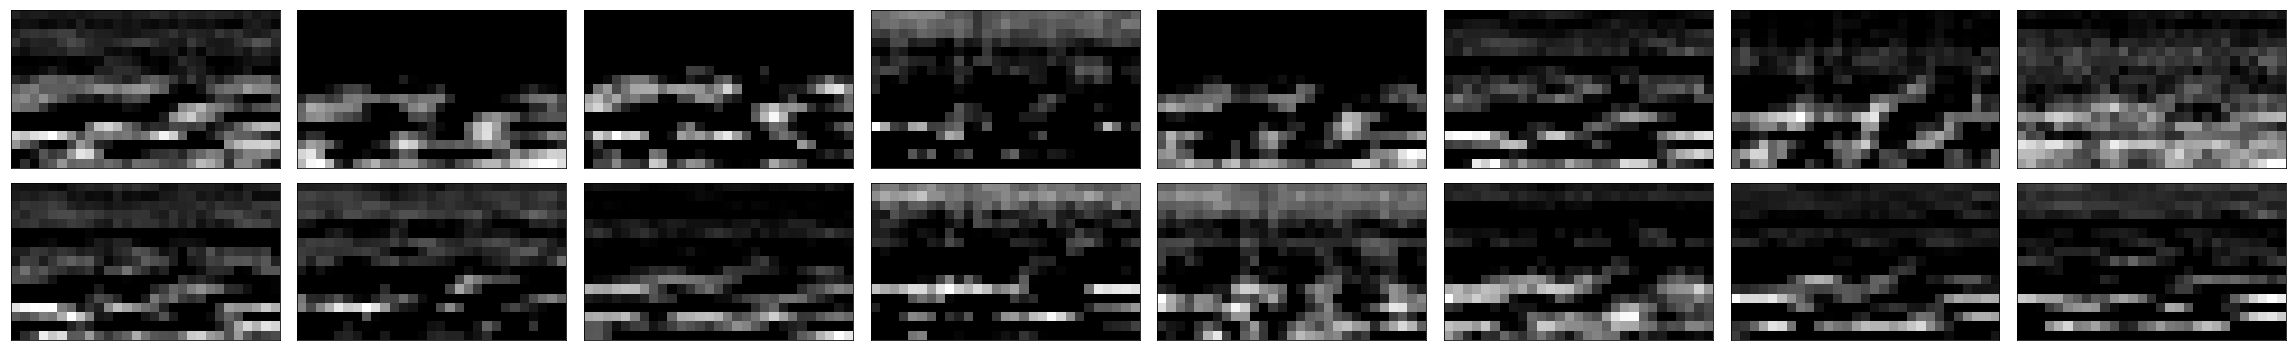

In [154]:
plot_layer(activations, image_number, 3, 8)

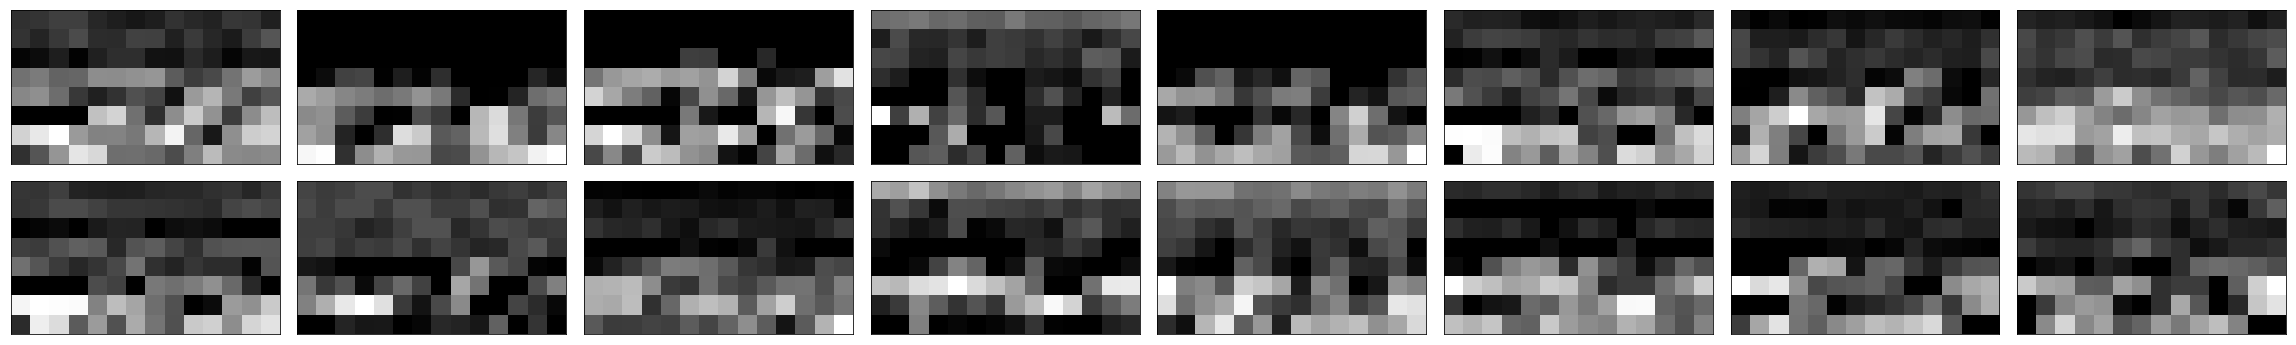

In [155]:
plot_layer(activations, image_number, 4, 8)

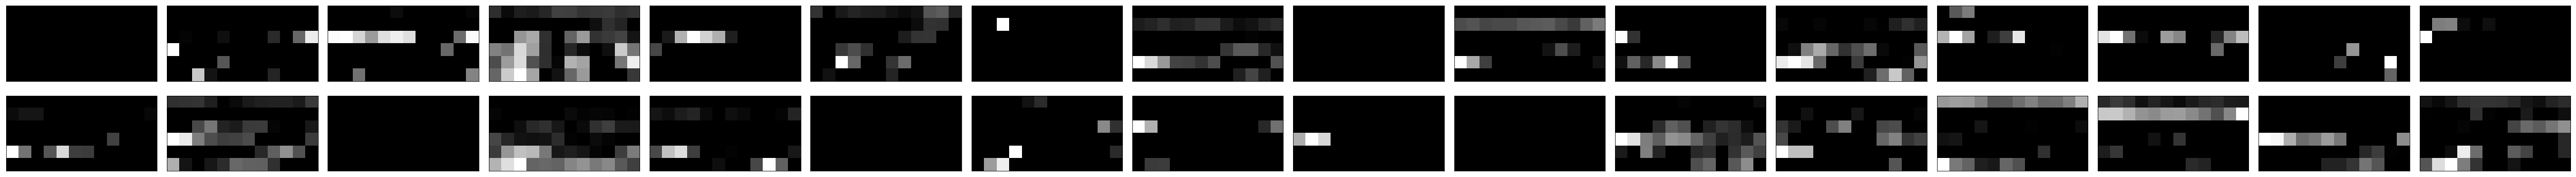

In [156]:
plot_layer(activations, image_number, 6, 16)

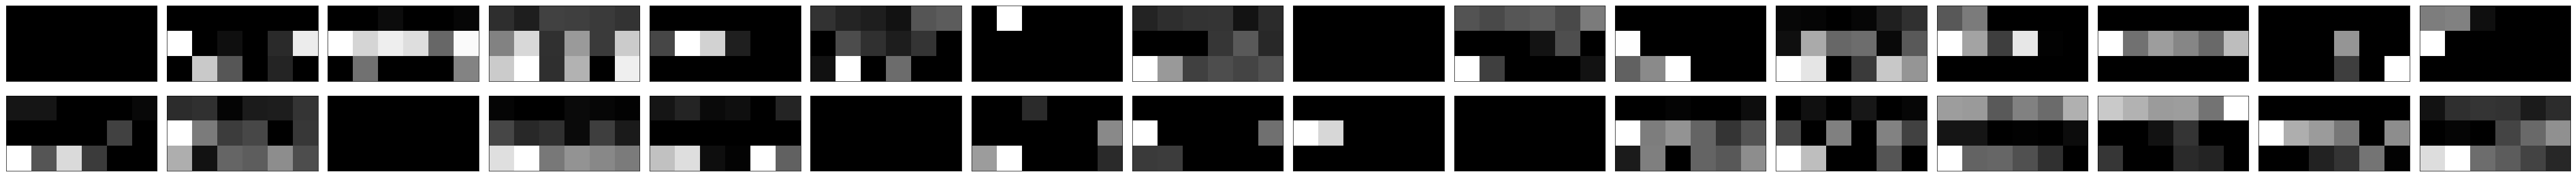

In [157]:
plot_layer(activations, image_number, 7, 16)